In [3]:
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt
from IPython.display import Audio

from scipy.io.wavfile import read, write
import matplotlib.pyplot as plt
import csv

## Code for Extracting Frames

In [4]:
# frames = []
# # cap = cv2.VideoCapture(0)
# cam = cv2.VideoCapture("../data/9.mp4")
# sec = 0
# frameRate = 0.1
# while cam.isOpened():
#     sec = sec + frameRate
#     sec = round(sec, 3)
#     cam.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
#     hasFrames,image = cam.read()
    
#     # Grab a grayscale image (We will refer to this as the previous frame)
#     if hasFrames == True:
#         frames.append(image)
#     else:
#         break

# cam.release()

## Code for Extracting Audio

In [6]:
# import subprocess

# for i in range(14,16):
#     cmd = "ffmpeg -i ~/Documents/cricket-vision/data/"+str(i)+".mp4 -ab 160k -ac 2 -ar 44100 -vn ../data/audio"+str(i-8)+".wav"
#     var = subprocess.call(cmd, shell=True)

In [7]:
# audio.argsort(axis=0)[-10:][::-1]

## Steps to do:
* Group into windows if lot more peaks are found
* Check for frequency perspective
* Learn MFCC
* Gather more data from matches
* Normalize data

Checking for say 5 windows among the data <- figure out a way to get five highest peaks

Choose sampling frequency


## Smoothening

In [8]:
from scipy.signal import find_peaks
import scipy
import pandas as pd
import os
import librosa

## Extracting MFCC
- Visualizing different ways to represent the audio
- A MFCC uses a quasi-logarithmic spaced frequency scale, which is more similar to how the human auditory system processes sounds.

In [10]:
def extract_features(file_name):
    '''
        Extract MFCC for audio windows annotated as above
    '''
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)

    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 

    return mfccsscaled

In [11]:
def extract_windows(filename):
    rate, audio = read(filename)
    print(rate)
    print(audio.shape)
    X = scipy.fft.fft(audio)
    X[X<7000] = 0
    audio_defft = scipy.fft.ifft(X)
    audio_defft = np.real(scipy.fft.ifft(np.real(X)))
    peaks, info = find_peaks(audio_defft[:,1], distance=10**5)
    plt.figure(figsize=(50,50))
    plt.plot(audio_defft)
    plt.scatter(peaks, [audio_defft[i][0] for i in peaks])
    plt.show()
    windows = list()
    for i in peaks:
        windows.append(audio_defft[i-40000:i+40000])
    print(np.asarray(windows).shape)
    print(peaks, [audio_defft[i][0] for i in peaks])
    for i,win in enumerate(windows):
        win = np.asarray(win, dtype=np.int16)
        write("../outputs/"+filename[8:-4]+"_"+str(i)+".wav", rate, win)

In [12]:
import glob
features,files = list(), list()
for name in glob.glob('../data/*.wav'):
    files.append(name)
files.sort()
print(files)

['../data/audio1.wav', '../data/audio2.wav', '../data/audio3.wav', '../data/audio4.wav', '../data/audio5.wav', '../data/audio6.wav', '../data/audio7.wav', '../data/download0.wav', '../data/download1.wav', '../data/spare.wav', '../data/spare1.wav']


In [13]:
# import csv
# Write Column Names
# with open('../outputs/strikes.csv', 'w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(["File", "Label"])

In [14]:
def writetocsv(filename, labels):
    with open('../outputs/strikes.csv', 'a', newline='') as file:
        writer = csv.writer(file)
        for i, label in enumerate(labels):
            writer.writerow([filename[8:-4]+"_"+str(i)+".wav",label])

In [15]:
sound_file = files[3]
Audio(sound_file, autoplay=True)

44100
(174414, 2)


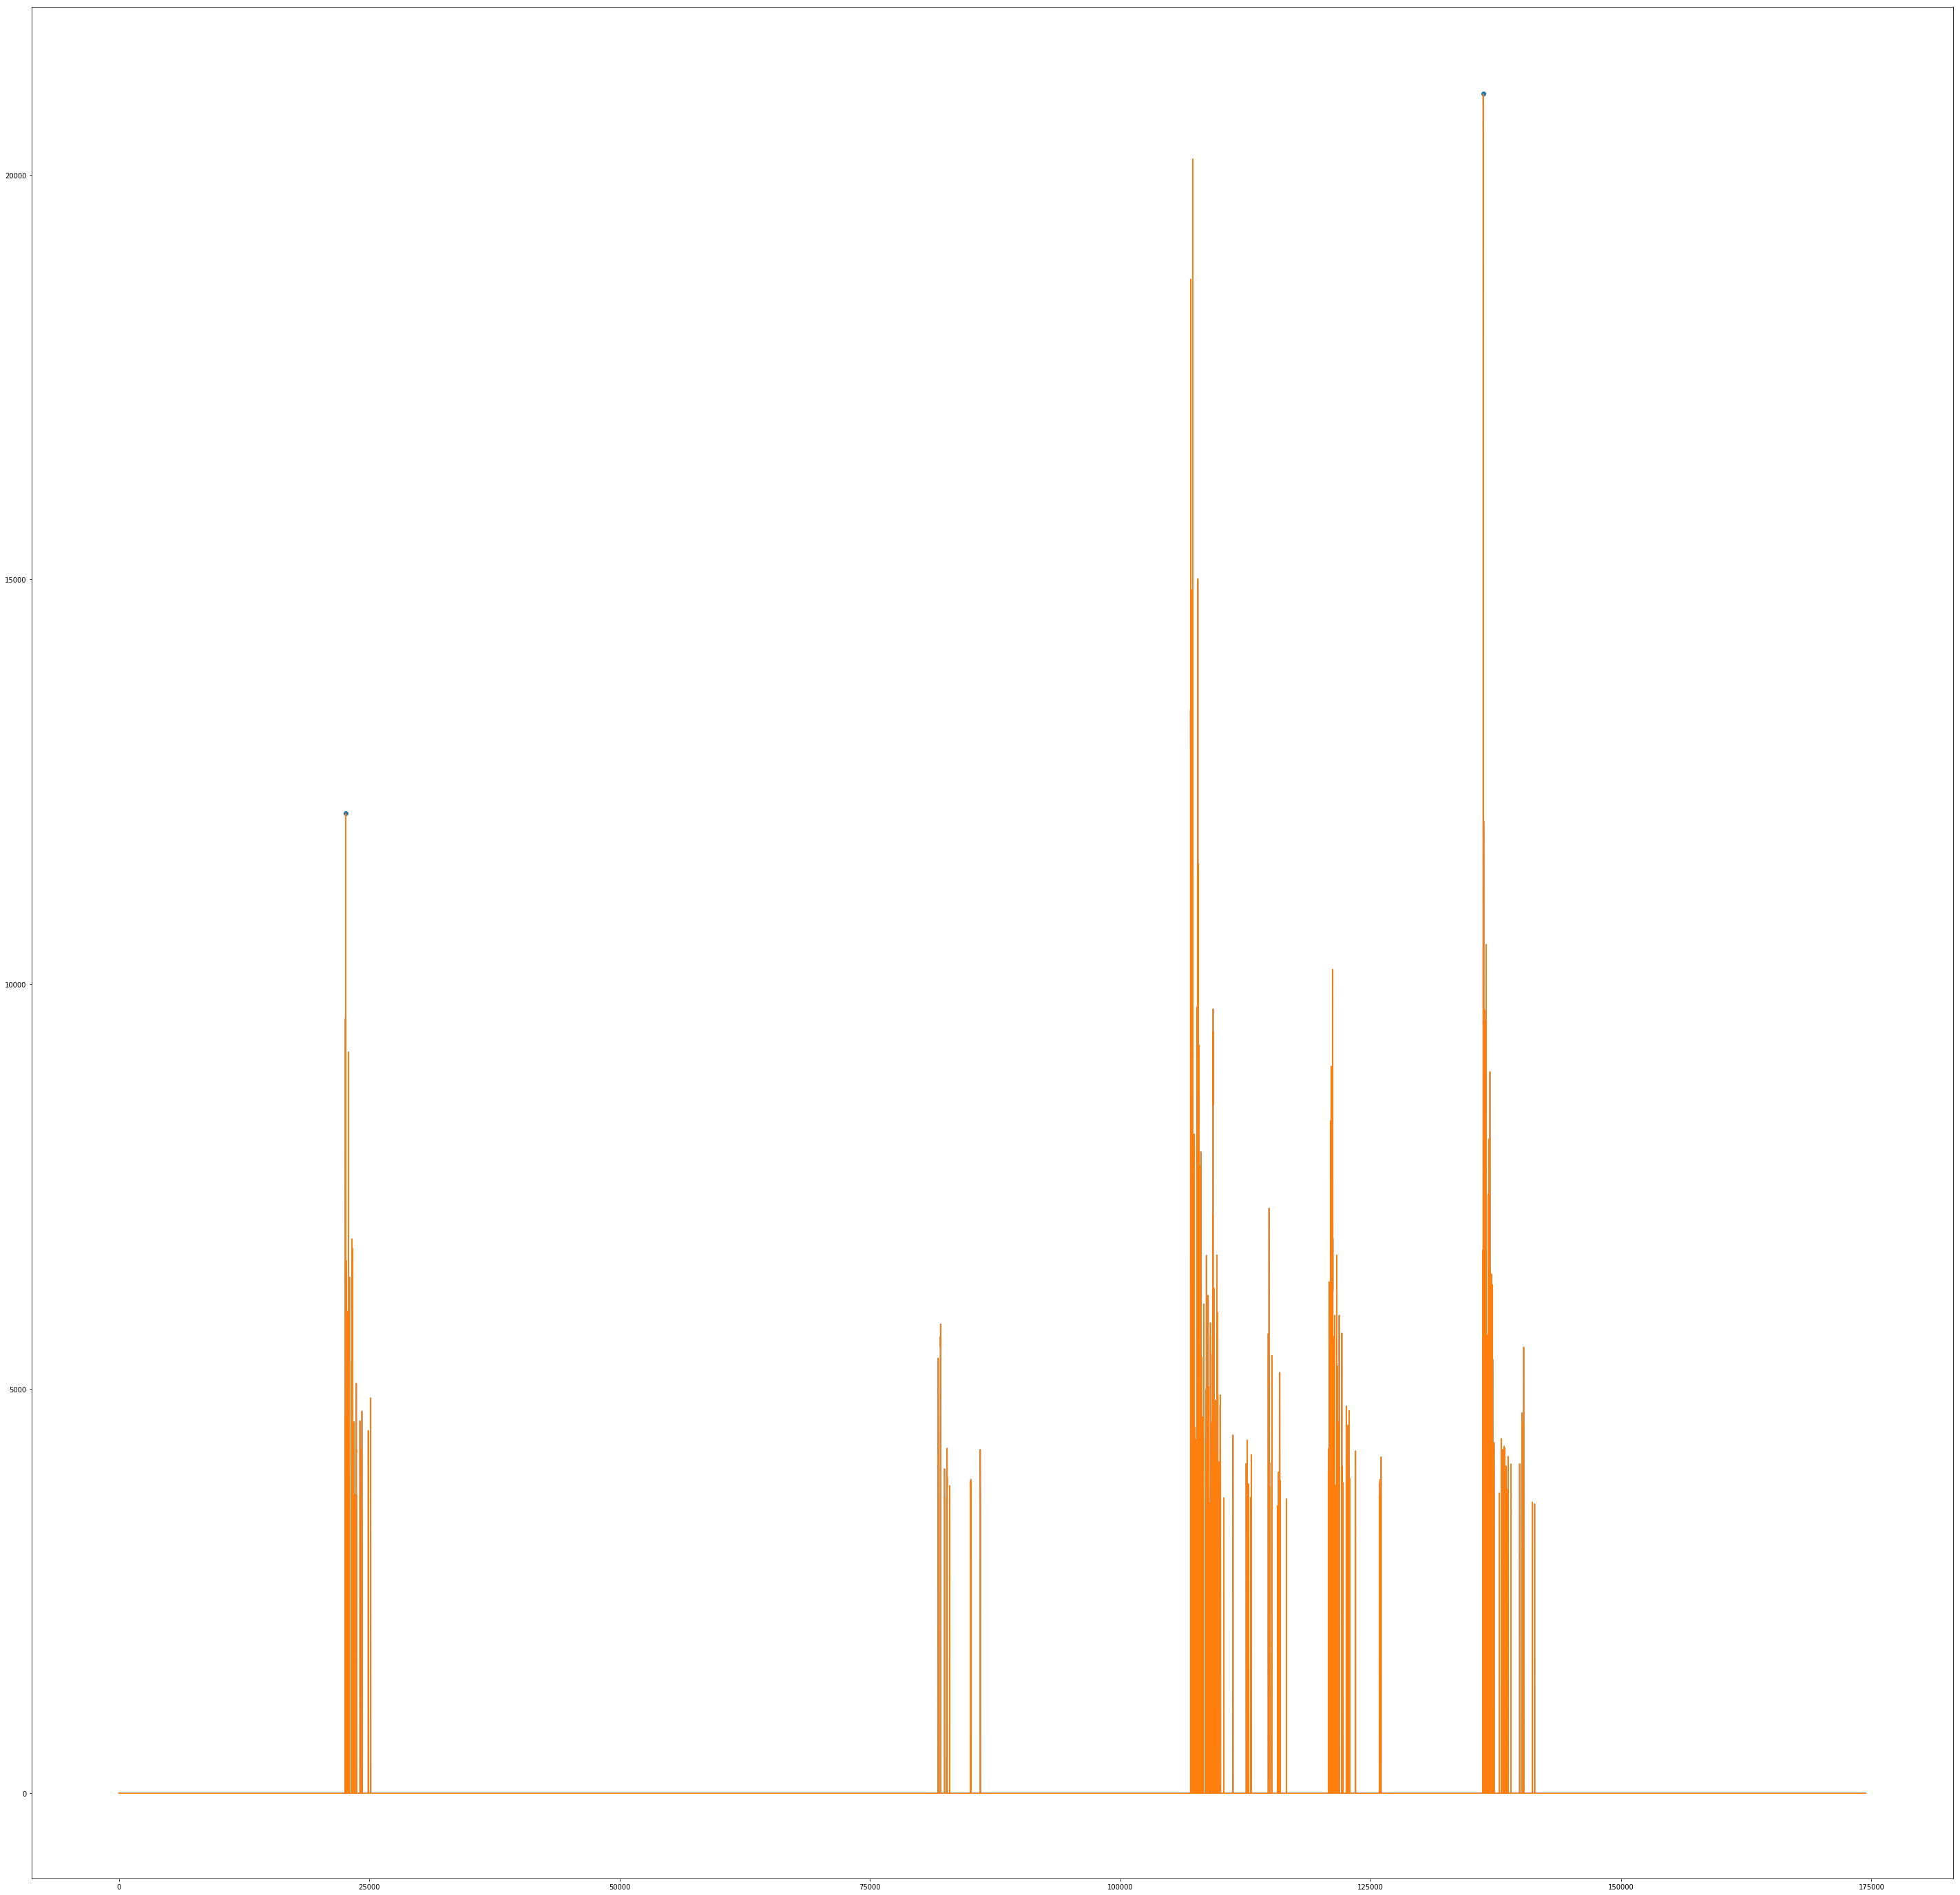

(2,)
[ 22667 136232] [12111.0, 20998.0]


In [16]:
extract_windows(files[3])

In [17]:
# writetocsv(files[5],[0,0,1,1,0,1,0,1,\
#                     1,0,0,1,1,1,0,1,\
#                     1,0,0,0,0,0,0,0,\
#                     0,1,1,0,1,0,1,0,\
#                     1,0,1,0,1,1,0,1,\
#                     0,1,1,0,1,0,0,1])

## Code to delete rows in csv

In [74]:
# with open('../outputs/strikes.csv', 'r') as inp, open('../outputs/strikes_mod.csv', 'w') as out:
#     writer = csv.writer(out)
#     data = csv.reader(inp)
#     for i,row in enumerate(data):
#         if i not in [7,8,9]:
#             writer.writerow(row)

In [79]:
import soundfile

data, samplerate = soundfile.read('../data/download1.wav')
soundfile.write('../data/download0.wav', data, samplerate, subtype='PCM_16')